In [1]:
pids = addprocs(10)

@everywhere begin
    include("voiConsAuc.jl")
    f(n, p1, p2) = evsi_sim([2, .5, 0], [1.25, .8, .75], [n * p1, n * p2, n * (1 - (p1 + p2))], nsims = 1000000)
    function g(n)
        s = 100
        x  = zeros(s, s)
        p1 = linspace(1, 0, s)
        p2 = linspace(0, 1, s)
        for i = 1:s
            for j = 1:i
                x[i, j] = f(n, p1[i], p2[j])
            end
        end
        y = ind2sub(size(x), indmax(x))
        [p1[y[1]], p2[y[2]]]
    end
end

In [2]:
y = @parallel hcat for n = linspace(0.0001, 10, 50)
  g(n)
end
rmprocs(pids)

:ok

In [ ]:
using RCall, DataFrames

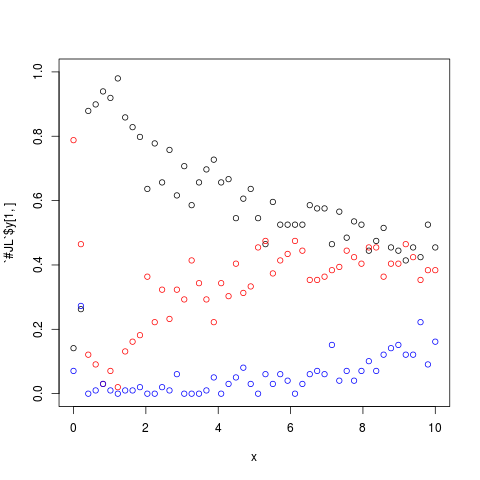

RCall.RObject{RCall.NilSxp}
NULL


In [9]:
R"
x = seq(.0001, 10, length.out = 50)
plot(x, $y[1,], ylim=0:1)
points(x, $y[2,], col = 'red') 
points(x, 1 - ($y[1,] + $y[2,]), col = 'blue')
"